<a href="https://colab.research.google.com/github/MuhammadNurulHuda03/prediksihargarumah1/blob/main/kelompok_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving housing.csv to housing.csv


In [ ]:
import pandas as pd
df = pd.read_csv("housing.csv")
df.head()


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Prediksi menggunakan model
y_pred = model.predict(X_test)

# Hitung MSE dan R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cetak hasil evaluasi
print("Mean Squared Error:", mse)
print("Coefficient of Determination (R2 Score):", r2)


Mean Squared Error: 3428515260.6211796
Coefficient of Determination (R2 Score): 0.8439995575360899


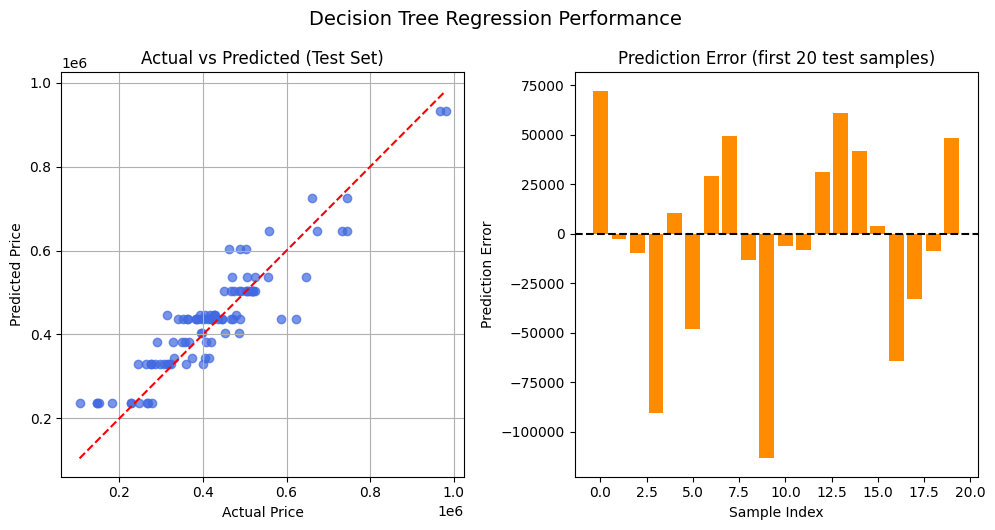

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Prediksi vs Nilai Asli (Test Set)
plt.figure(figsize=(10, 5))

# Scatter Plot: Nilai Aktual vs Prediksi
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # garis ideal
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted (Test Set)')
plt.grid(True)

# Bar Plot: Error untuk 20 data pertama
plt.subplot(1, 2, 2)
errors = y_test.values - y_pred
plt.bar(np.arange(20), errors[:20], color='darkorange')
plt.axhline(0, color='black', linestyle='--')
plt.title('Prediction Error (first 20 test samples)')
plt.xlabel('Sample Index')
plt.ylabel('Prediction Error')

plt.tight_layout()
plt.suptitle('Decision Tree Regression Performance', fontsize=14, y=1.05)
plt.show()


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Memuat dataset
X, y = fetch_california_housing(return_X_y=True)

# Menggunakan hanya satu fitur: Median Income
X = X[:, [0]]  # fitur ke-0 = MedInc

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Membuat dan melatih model regresi linier
regressor = LinearRegression().fit(X_train, y_train)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Prediksi harga rumah pada data uji
y_pred = regressor.predict(X_test)

# Evaluasi performa model
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination (R^2): {r2_score(y_test, y_pred):.2f}")


Mean squared error: 0.71
Coefficient of determination (R^2): 0.46


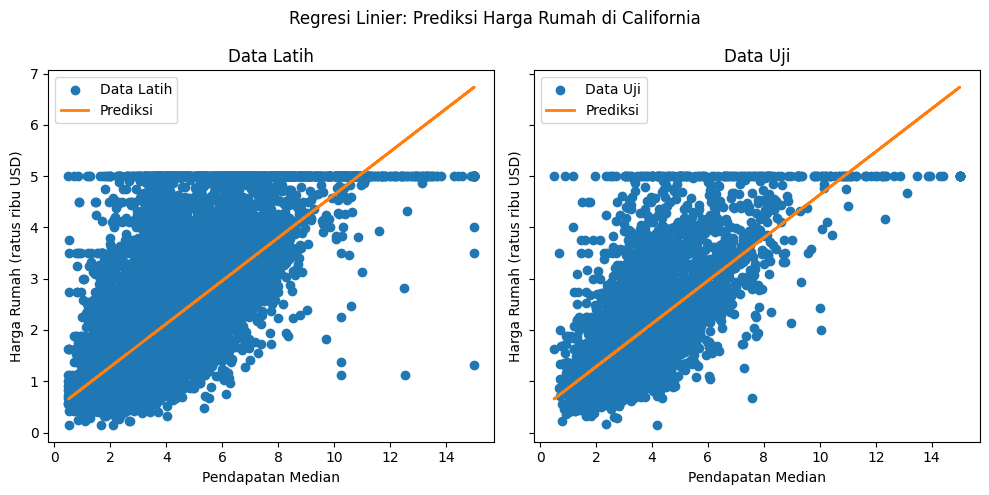

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

# Data latih
ax[0].scatter(X_train, y_train, label="Data Latih")
ax[0].plot(X_train, regressor.predict(X_train), color="tab:orange", linewidth=2, label="Prediksi")
ax[0].set(title="Data Latih", xlabel="Pendapatan Median", ylabel="Harga Rumah (ratus ribu USD)")
ax[0].legend()

# Data uji
ax[1].scatter(X_test, y_test, label="Data Uji")
ax[1].plot(X_test, y_pred, color="tab:orange", linewidth=2, label="Prediksi")
ax[1].set(title="Data Uji", xlabel="Pendapatan Median", ylabel="Harga Rumah (ratus ribu USD)")
ax[1].legend()

fig.suptitle("Regresi Linier: Prediksi Harga Rumah di California")
plt.tight_layout()
plt.show()
